# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of financial data. 

1. Install the yfinance library if you don't already have it.

2. *(2 points)* Download the **adjusted** close prices for META, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
Make sure the data does not contain any missing values before you plot the autocorrelations or scatter matrix.

---------

## Downloading Stock Prices

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = "iY5sJ2uzbq9vke7yDVSw"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "YOUR_API_KEY"

env: QUANDL_API_KEY="iY5sJ2uzbq9vke7yDVSw"


In [3]:
# Make sure you adjust the start and end date accordingly
# so that the end date = today's date

import datetime

start = datetime.datetime(2020, 11, 23)
end = datetime.datetime(2025, 11, 23)

Use the Yahoo Finance `yfinance` library:

In [4]:
import yfinance as yf

In [5]:
#amzn = yf.download('AMZN', start=start)

In [6]:
# If we want to download multipe stocks :

all_stocks_list = ['AMZN', 'META','MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start,end=end,auto_adjust=False)

[*********************100%***********************]  4 of 4 completed


In [7]:
## TYPE YOUE CODE BELOW

In [8]:
all_stocks.head(5)

Price        Adj Close                                          Close  \
Ticker            AMZN        IBM        META         MMM        AMZN   
Date                                                                    
2020-11-23  154.919495  93.343208  266.785339  121.100975  154.919495   
2020-11-24  155.903000  96.708801  275.223358  123.145523  155.903000   
2020-11-25  159.253494  96.537811  273.901459  123.173340  159.253494   
2020-11-27  159.766998  96.654411  276.107849  123.013405  159.766998   
2020-11-30  158.401993  96.009262  275.273010  120.120438  158.401993   

Price                                                 High              ...  \
Ticker             IBM        META         MMM        AMZN         IBM  ...   
Date                                                                    ...   
2020-11-23  114.808792  268.429993  145.602005  156.987503  115.219887  ...   
2020-11-24  118.948372  276.920013  148.060196  156.712494  119.244743  ...   
2020-11-25  118.738052  275.589996  148.093643  159.899994  118.862335  ...   
2020-11-27  118.881454  277.809998  147.901337  160.809494  119.799232  ...   
2020-11-30  118.087952  276.970001  144.423080  161.419495  119.502869  ...   

Price              Low                    Open                          \
Ticker            META         MMM        AMZN         IBM        META   
Date                                                                     
2020-11-23  264.529999  145.025085  155.835007  112.265778  270.890015   
2020-11-24  267.869995  146.237457  155.024994  115.544930  268.489990   
2020-11-25  272.649994  146.697327  157.093506  117.523903  278.140015   
2020-11-27  274.820007  146.797653  160.563004  118.738052  277.390015   
2020-11-30  271.010010  144.397995  160.423996  118.642448  276.029999   

Price                     Volume                              
Ticker             MMM      AMZN      IBM      META      MMM  
Date                                                          
2020-11-23  145.284286  94178000  5910318  20990800  2468903  
2020-11-24  146.321075  72042000  8109115  16930400  3690856  
2020-11-25  147.859528  75808000  4326151  12467000  2454431  
2020-11-27  148.678925  47858000  2187395   7808400  1515452  
2020-11-30  146.964890  81278000  6263448  16693300  7344995  

[5 rows x 24 columns]

In [9]:
all_stocks.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'META'),
            ('Adj Close',  'MMM'),
            (    'Close', 'AMZN'),
            (    'Close',  'IBM'),
            (    'Close', 'META'),
            (    'Close',  'MMM'),
            (     'High', 'AMZN'),
            (     'High',  'IBM'),
            (     'High', 'META'),
            (     'High',  'MMM'),
            (      'Low', 'AMZN'),
            (      'Low',  'IBM'),
            (      'Low', 'META'),
            (      'Low',  'MMM'),
            (     'Open', 'AMZN'),
            (     'Open',  'IBM'),
            (     'Open', 'META'),
            (     'Open',  'MMM'),
            (   'Volume', 'AMZN'),
            (   'Volume',  'IBM'),
            (   'Volume', 'META'),
            (   'Volume',  'MMM')],
           names=['Price', 'Ticker'])


Question 2

In [10]:
adj_close_p=all_stocks.xs('Adj Close',level=0,axis=1)
adj_close_p.head(5)

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-11-23,154.919495,93.343208,266.785339,121.100975
2020-11-24,155.903000,96.708801,275.223358,123.145523
2020-11-25,159.253494,96.537811,273.901459,123.173340
2020-11-27,159.766998,96.654411,276.107849,123.013405
2020-11-30,158.401993,96.009262,275.273010,120.120438


Question 3

In [11]:
adj_close_bme=adj_close_p.resample('BME').last()
adj_close_bme.head(20)
#adj_close_bme.tail(20)

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-11-30,158.401993,96.009262,275.273010,120.120438
2020-12-31,162.846497,97.843628,271.486359,121.553017
2021-01-29,160.309998,92.581474,256.747253,122.158051
2021-02-26,154.646500,93.676834,256.041534,122.743965
2021-03-31,154.703995,104.964073,292.725433,135.098312
2021-04-30,173.371002,111.753723,323.088226,138.225433
2021-05-31,161.153503,114.483780,326.715942,143.409851
2021-06-30,172.007996,116.753708,345.579590,140.295059
2021-07-30,166.379501,112.269630,354.116943,139.807709


Question 4

In [12]:
import matplotlib.pyplot as plt

#There is autocorrelation - the prices are not random. 
#All graphs started out with a strong positive autocorrelation and crossed into negative autocorrelation around lag 15-20.
#At this time the world was starting to see the light at the end of the covid tunnel which caused a significant price correction.
#The graphs start to trend upwards around 30-50 lags - this could indicate that the prices were starting to experience recovery.
#Towards the end of the plots, the lines are close to or on 0 - this is because as the lags get higher the past prices are not as helpful for
#understanding current prices.

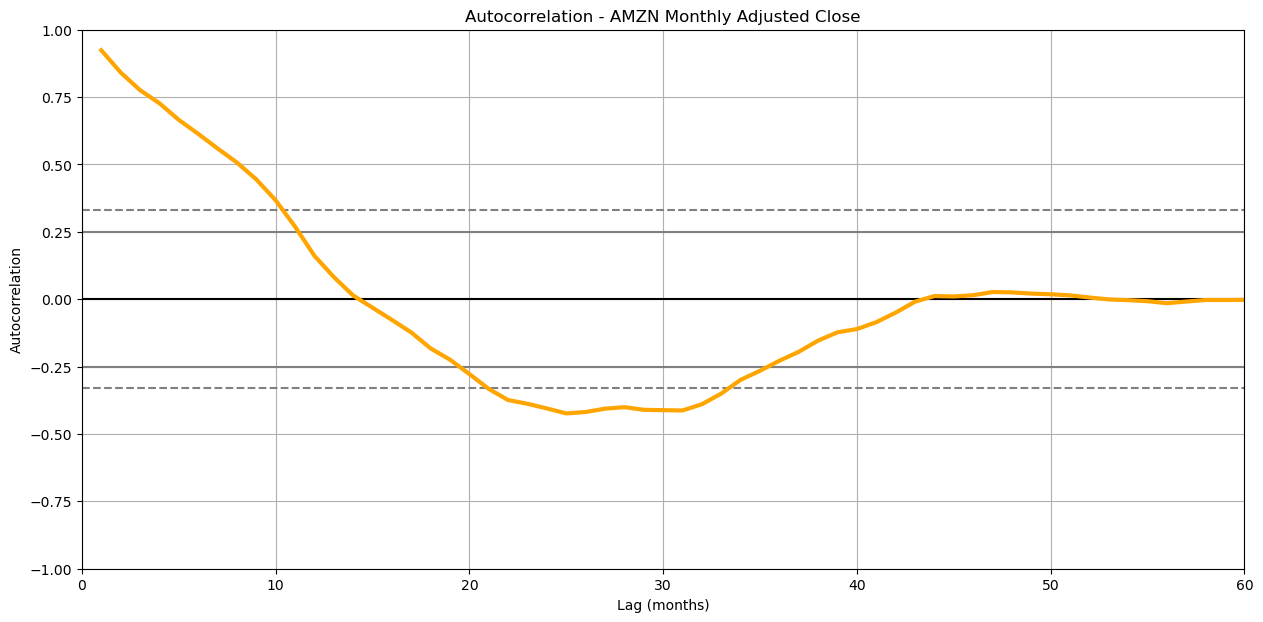

In [13]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(adj_close_bme["AMZN"],c='orange',linewidth=3)
ax.set_xlim(0,len(adj_close_bme["AMZN"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - AMZN Monthly Adjusted Close")
plt.show()

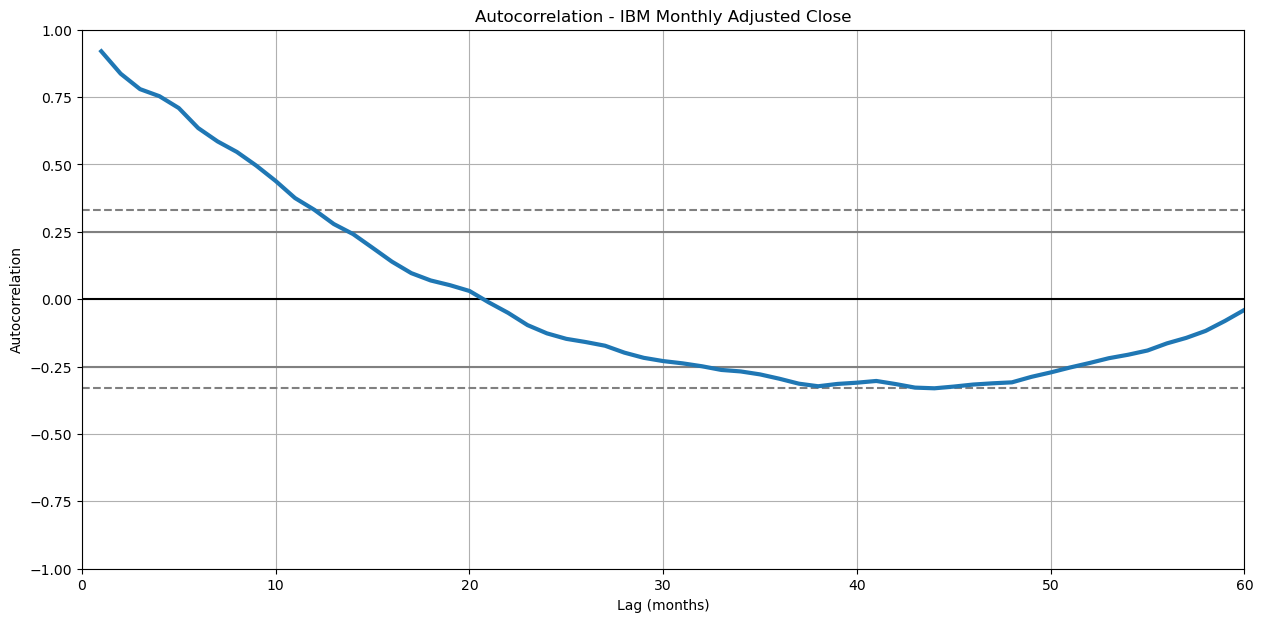

In [14]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(adj_close_bme["IBM"],linewidth=3)
ax.set_xlim(0,len(adj_close_bme["IBM"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - IBM Monthly Adjusted Close")
plt.show()

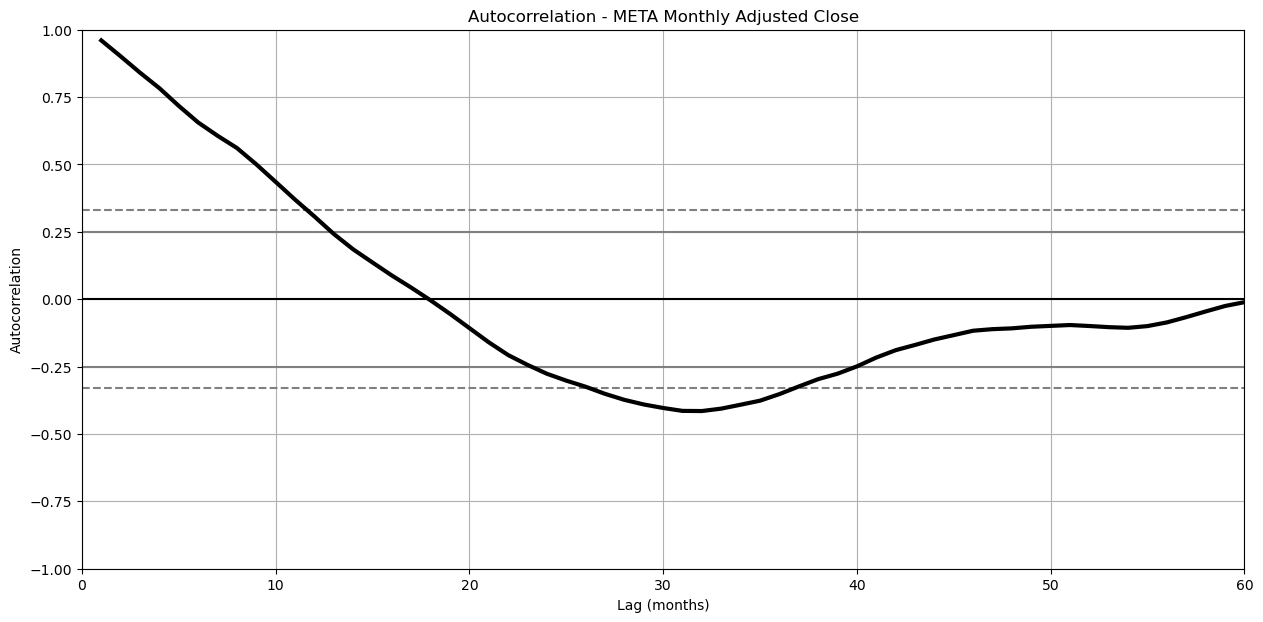

In [15]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(adj_close_bme["META"],c='black',linewidth=3)
ax.set_xlim(0,len(adj_close_bme["META"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - META Monthly Adjusted Close")
plt.show()

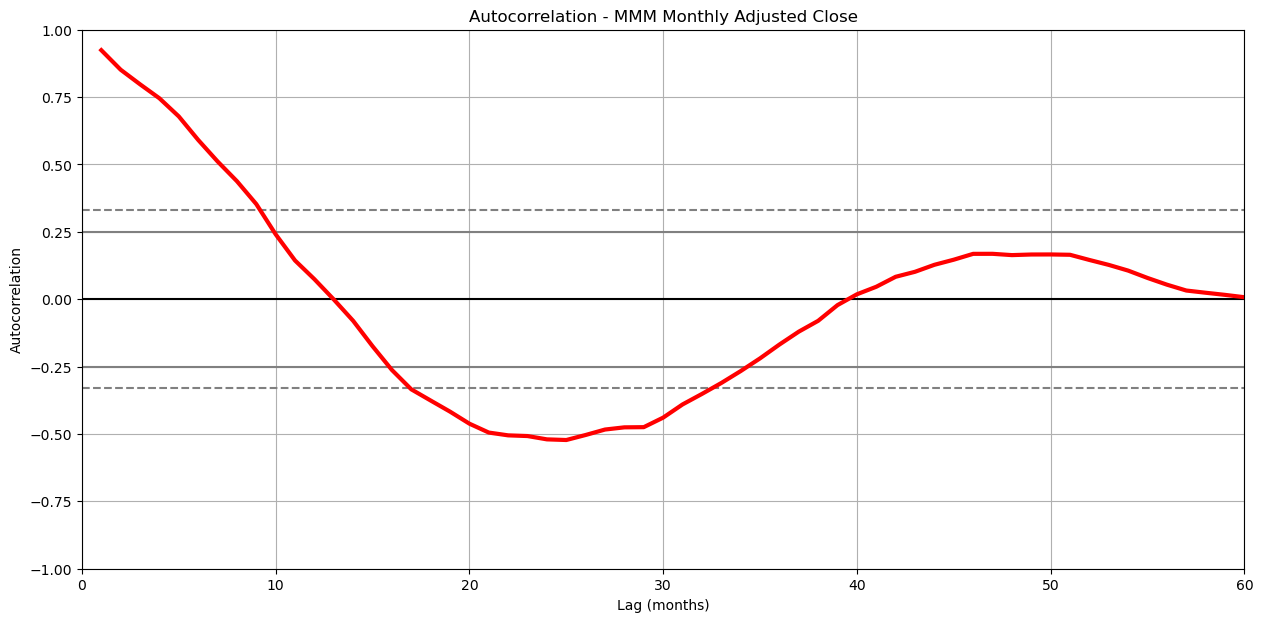

In [16]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(adj_close_bme["MMM"],c='red',linewidth=3)
ax.set_xlim(0,len(adj_close_bme["MMM"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - MMM Monthly Adjusted Close")
plt.show()

Question 5

In [17]:
monthly_returns=(adj_close_bme-adj_close_bme.shift(1))/adj_close_bme.shift(1)
monthly_returns=monthly_returns.dropna()
monthly_returns.head(10)

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-12-31,0.028058,0.019106,-0.013756,0.011926
2021-01-29,-0.015576,-0.053781,-0.054290,0.004978
2021-02-26,-0.035328,0.011831,-0.002749,0.004796
2021-03-31,0.000372,0.120491,0.143273,0.100651
2021-04-30,0.120663,0.064685,0.103724,0.023147
2021-05-31,-0.070470,0.024429,0.011228,0.037507
2021-06-30,0.067355,0.019828,0.057737,-0.021720
2021-07-30,-0.032722,-0.038406,0.024704,-0.003474
2021-08-31,0.043034,0.007064,0.064777,-0.008657


In [18]:
#The monthly returns graphs behave like white noise:
#There is no autocorrelation for all 4 stocks- the values fluctuate close to zero (mean close to zero).
#There is no clear pattern or trend.

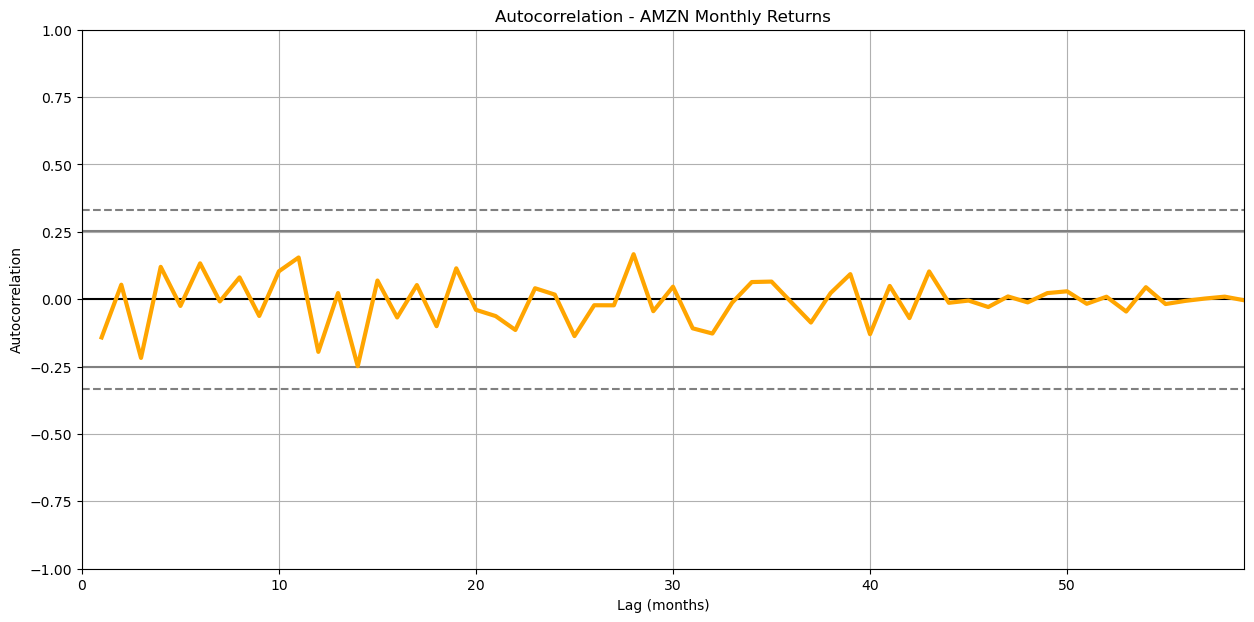

In [19]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(monthly_returns["AMZN"],c='orange',linewidth=3)
ax.set_xlim(0,len(monthly_returns["AMZN"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - AMZN Monthly Returns")
plt.show()

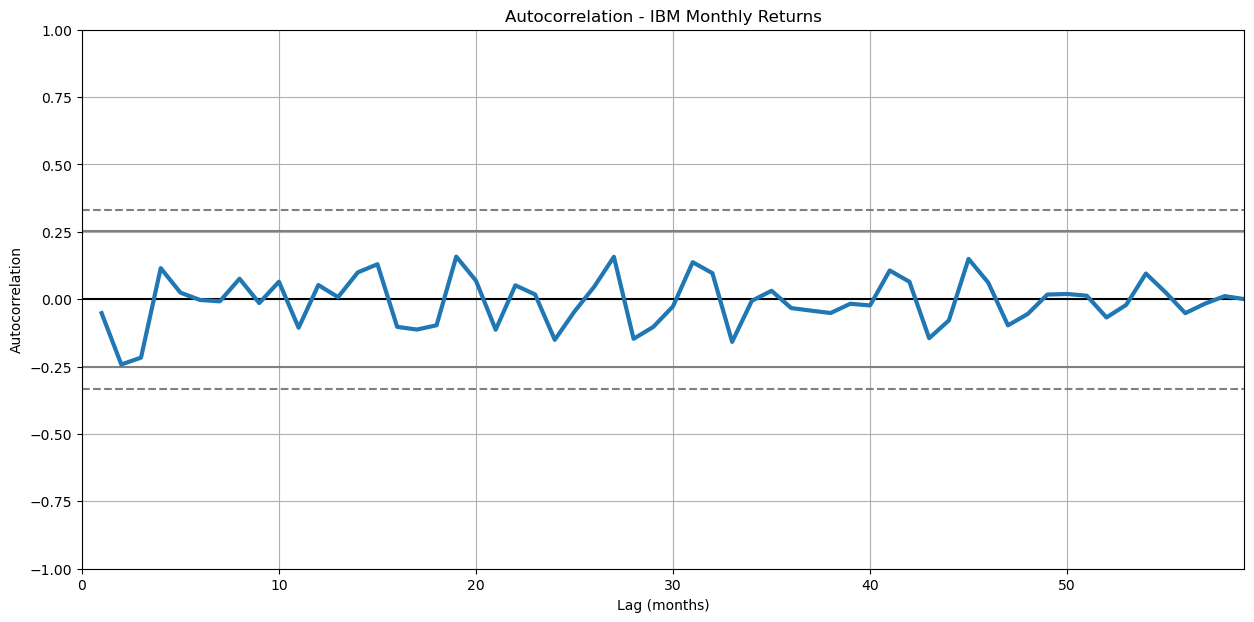

In [20]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(monthly_returns["IBM"],linewidth=3)
ax.set_xlim(0,len(monthly_returns["IBM"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - IBM Monthly Returns")
plt.show()

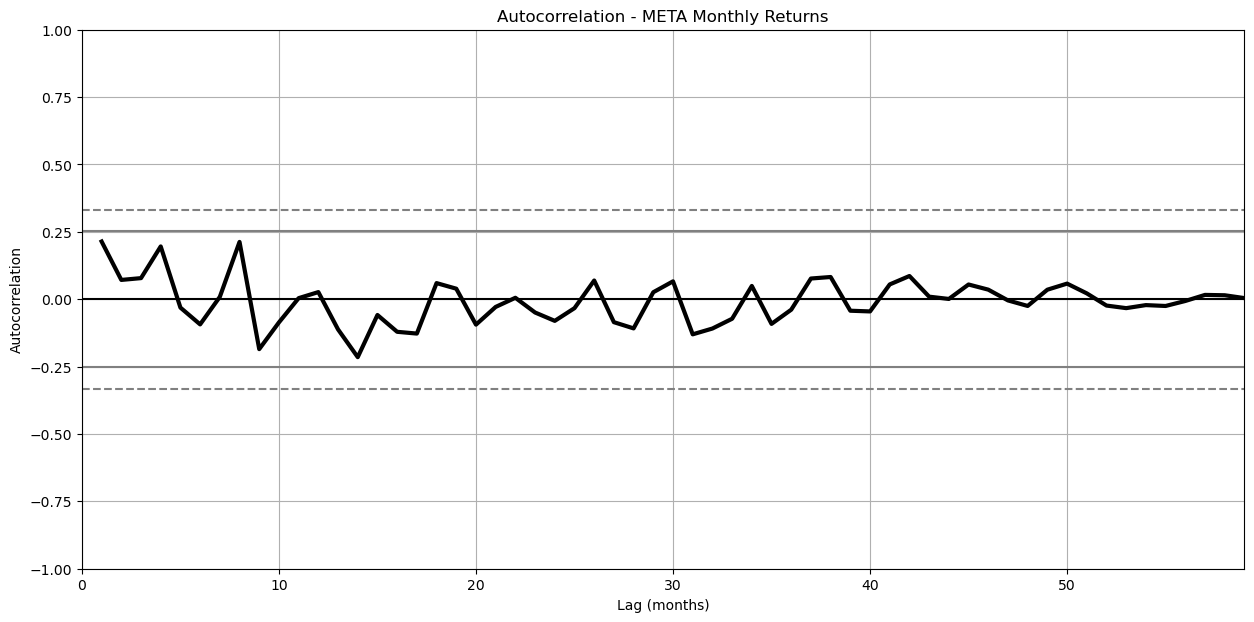

In [21]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(monthly_returns["META"],c='black',linewidth=3)
ax.set_xlim(0,len(monthly_returns["META"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - META Monthly Returns")
plt.show()

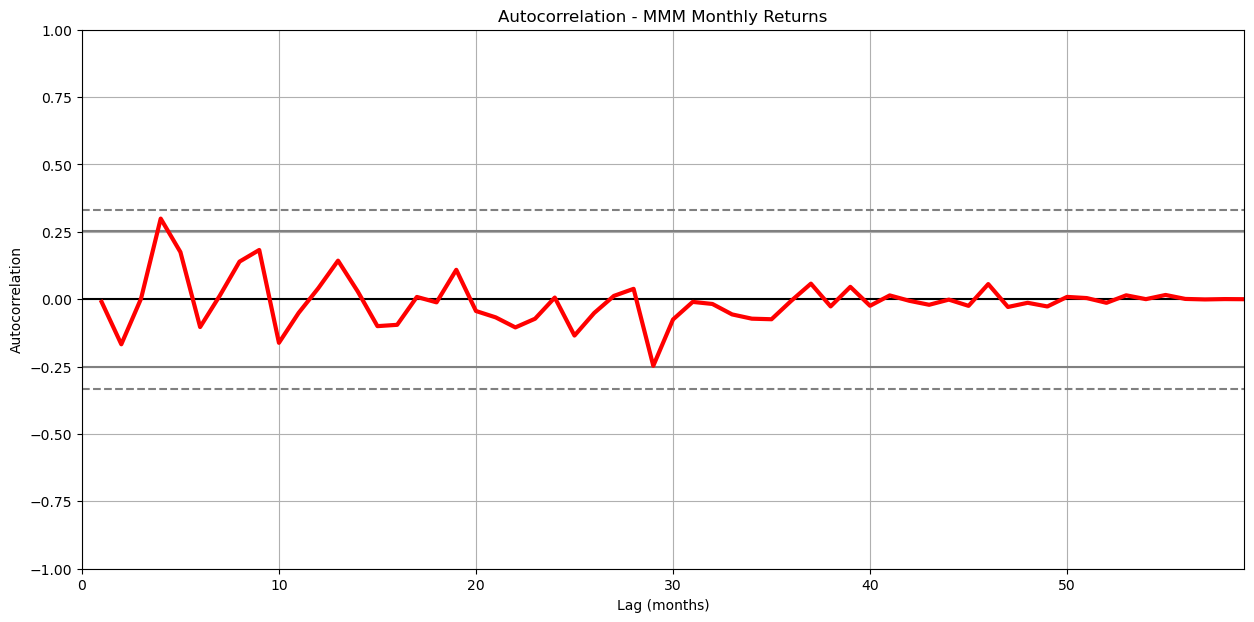

In [22]:
plt.figure(figsize=(15,7))
ax = autocorrelation_plot(monthly_returns["MMM"],c='red',linewidth=3)
ax.set_xlim(0,len(monthly_returns["MMM"])-1)
ax.set_xlabel("Lag (months)")
plt.title("Autocorrelation - MMM Monthly Returns")
plt.show()

Question 6

In [23]:
#Data is already combined in one DataFrame
monthly_returns.head(10)

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-12-31,0.028058,0.019106,-0.013756,0.011926
2021-01-29,-0.015576,-0.053781,-0.054290,0.004978
2021-02-26,-0.035328,0.011831,-0.002749,0.004796
2021-03-31,0.000372,0.120491,0.143273,0.100651
2021-04-30,0.120663,0.064685,0.103724,0.023147
2021-05-31,-0.070470,0.024429,0.011228,0.037507
2021-06-30,0.067355,0.019828,0.057737,-0.021720
2021-07-30,-0.032722,-0.038406,0.024704,-0.003474
2021-08-31,0.043034,0.007064,0.064777,-0.008657


<Figure size 1500x800 with 0 Axes>

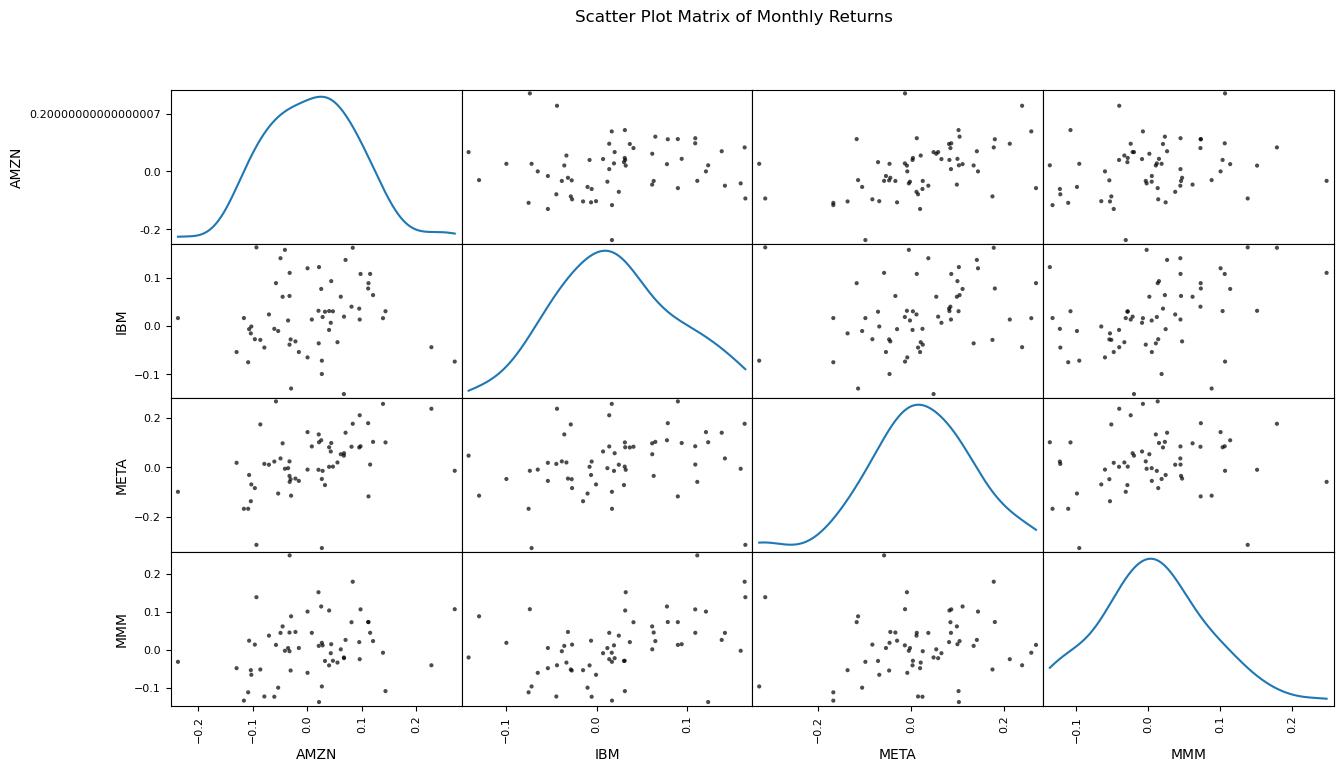

In [24]:
#No visible correlation between the stocks - the scatter plots all look very random, no obvious pattern.
#The monthly returns for all 4 stocks appear to be normally distributed or close to due to the bell shape curve. 
#AMZN and IBM data seems evenly distributed.
#META and MMM data appears slightly skewed - tail on one of the sides.

from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,8))
scatter_matrix(monthly_returns,diagonal='kde',figsize=(15,8),alpha=0.7,c='black')
plt.suptitle('Scatter Plot Matrix of Monthly Returns')
plt.show()